In [1]:
import numpy as np
import pandas as pd
from scipy.integrate import solve_ivp
from matplotlib import pyplot as plt
from PIL import Image

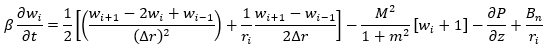

In [2]:
Image.open('discretized.png')

In [3]:
def rhs(w, t, N, M, m, dpdz, beta=10):
    dwdt = np.zeros(N)
    w[0], w[-1] = -1, -1
    dr = 1 / N
    
    for i in range(1, N-1):
        wr = (w[i+1] - w[i-1]) / (2 * dr)
        wrr = (w[i+1] - 2 * w[i] + w[i-1]) / (dr ** 2)
        r = i * dr
        A = 0.5 * (wrr + wr / r)
        B = (M**2) * (w[i] + 1) / (1 + m**2)
        try:
            C = dpdz(t)
        except TypeError:
            C = dpdz
        dwdt[i] = A - B - C
        dwdt[i] /= beta
    return dwdt
N = 50

In [40]:
def solver_1(t, w):
    M2 = 10 ** 0.5
    m = 1.5
    omega = 800
#     Bn = 1
    dpdz = lambda x: -(0.2 + 0.4 * np.math.cos(omega * x))
    return rhs(w, t, N, M2, m, dpdz)

w0 = np.ones(N)
w0 *= -1

s1 = solve_ivp(solver_1, (0, 5), w0)
df1 = pd.DataFrame(s1.y)
df1.head(2)

,0,1,2,3,4,5,6,7,8,9,...,745,746,747,748,749,750,751,752,753,754
0,-1.0,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.00000,-1.000000,-1.00000,-1.000000,-1.000000
1,-1.0,-1.001156,-1.000498,-1.000198,-1.000548,-1.000148,-0.999865,-0.999873,-1.000088,-0.999757,...,-0.982982,-0.982686,-0.982828,-0.982943,-0.982912,-0.98266,-0.982888,-0.98298,-0.982885,-0.983107


In [98]:
def multi_plot(min=0, max=20, timestep=1):
    if max - min != 20:
        raise Exception('max - min must be = 0')
    
    interval = np.arange(min, max + 1, 5) # [0, 5, 10, 15]
    rs = np.linspace(0.5, 1.5, N)
    with plt.style.context('fivethirtyeight'):
        fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(15,5))
        for i in range(interval[0], interval[1], timestep):
            ax1.plot(rs, df1.iloc[:, i], label=f'$t={s1.t[i] * pow(10, 3):.2f}$', linewidth=2)
    #     ax1.legend()
        for i in range(interval[1], interval[2], timestep):
            ax2.plot(rs, df1.iloc[:, i], label=f'$t={s1.t[i] * pow(10, 3):.2f}$', linewidth=2)
        for i in range(interval[2], interval[3], timestep):
            ax3.plot(rs, df1.iloc[:, i], label=f'$t={s1.t[i] * pow(10, 3):.2f}$', linewidth=2)
        for i in range(interval[3], interval[4], timestep):
            ax4.plot(rs, df1.iloc[:, i], label=f'$t={s1.t[i] * pow(10, 3):.2f}$', linewidth=2)
        space = r'\hspace{1}'
        t_min = r't_{min}'
        t_max = r't_{max}'
        fig.suptitle(fr'${t_min}={min}{space}{t_max}={max}{space}time step={timestep}$')

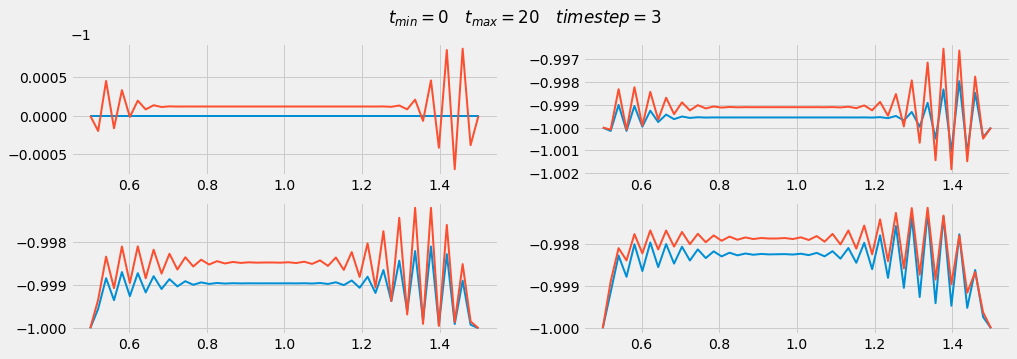

In [101]:
multi_plot(0, 20, 3)

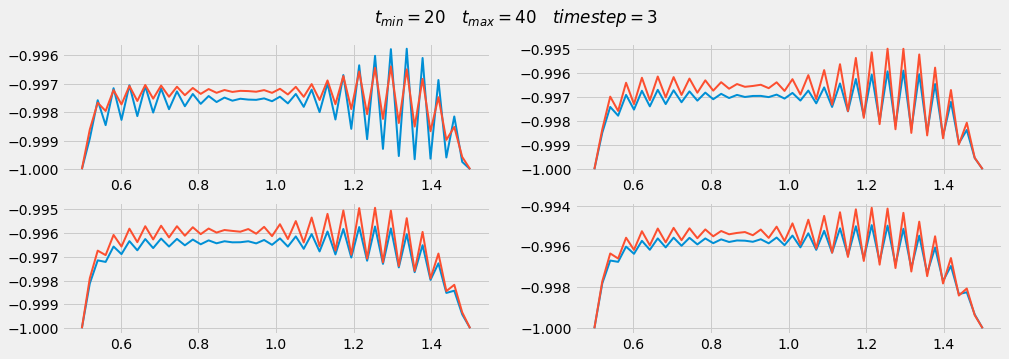

In [102]:
multi_plot(20, 40, 3)

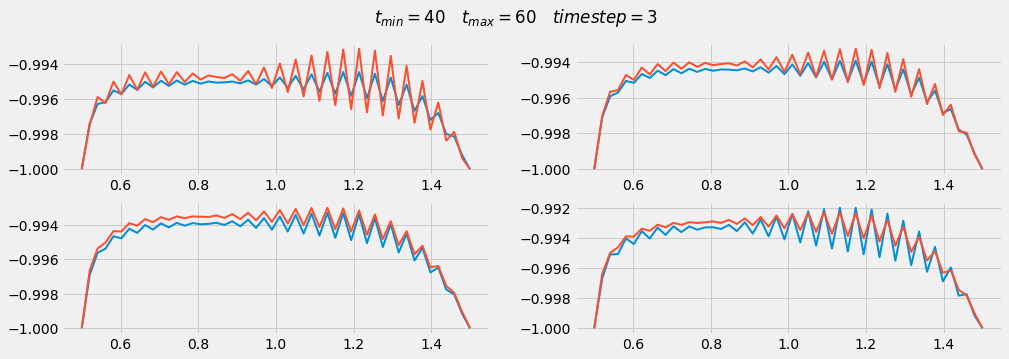

In [104]:
multi_plot(40, 60, 3)

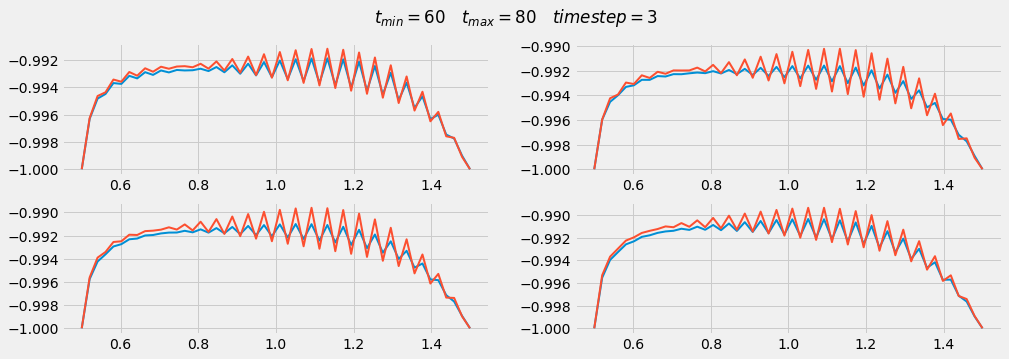

In [105]:
multi_plot(60, 80, 3)

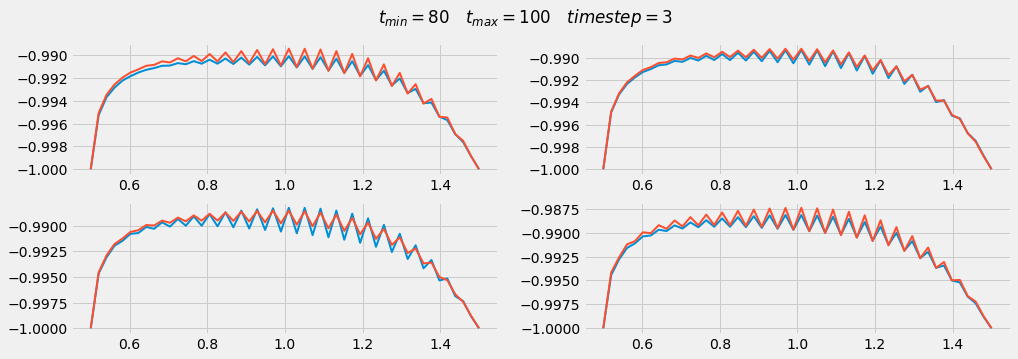

In [106]:
multi_plot(80, 100, 3)

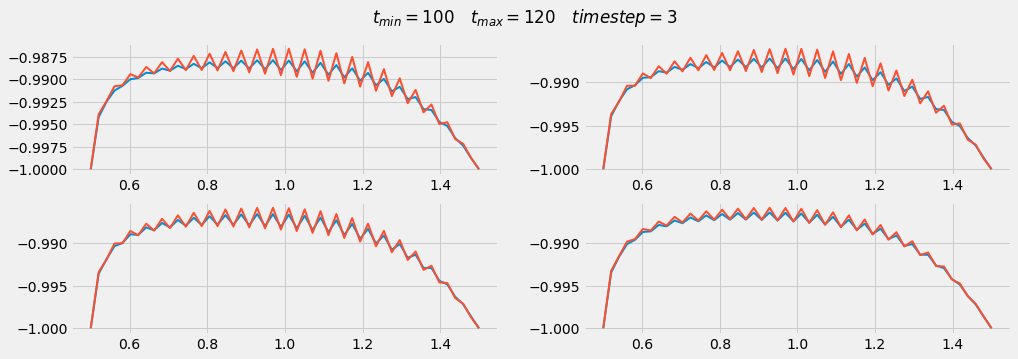

In [107]:
multi_plot(100, 120, 3)

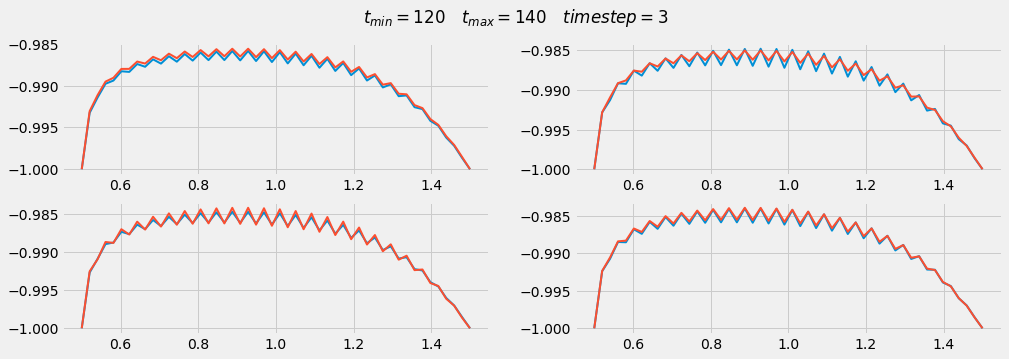

In [108]:
multi_plot(120, 140, 3)

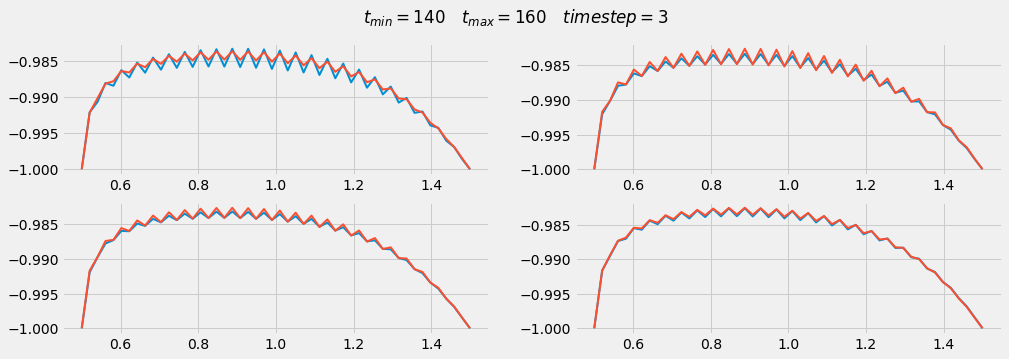

In [109]:
multi_plot(140, 160, 3)

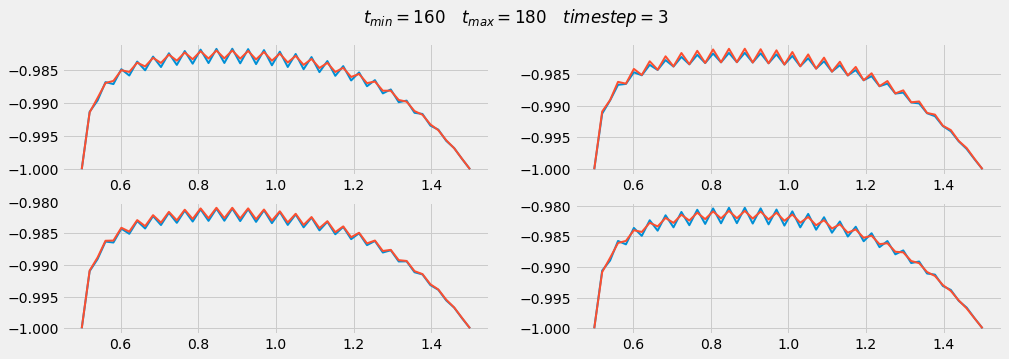

In [110]:
multi_plot(160, 180, 3)

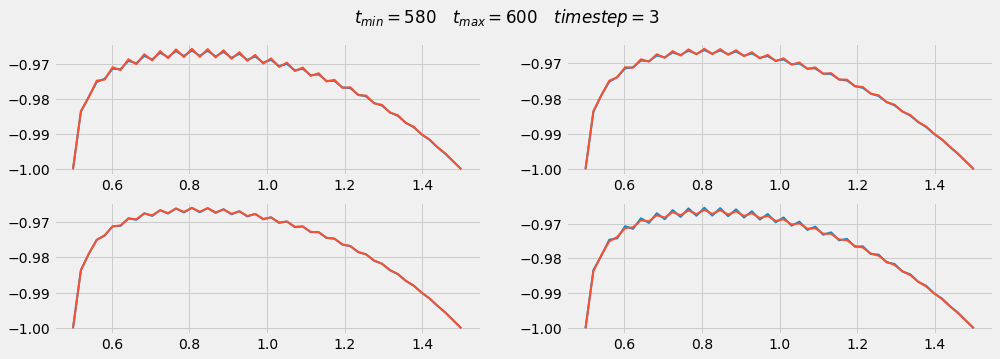

In [118]:
multi_plot(580, 600, 3)

In [139]:
def solver_2(t, w):
    M2 = 10 ** 0.5
    m = 1.5
    omega = 8
#     Bn = 1
    dpdz = 10
    return rhs(w, t, N, M2, m, dpdz)

w0 = np.ones(N)
w0 *= -1

s2 = solve_ivp(solver_2, (0, 5), w0)
df2 = pd.DataFrame(s2.y)

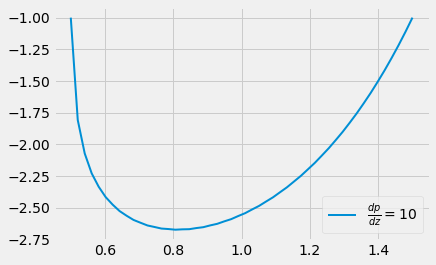

In [152]:
with plt.style.context('fivethirtyeight'):
# for i in range(0, N, 10):
#     plt.plot(np.arange(N), df.iloc[:, i], label=f'$t={i}$', linewidth=2)
#     plt.plot(rs, df1.iloc[:, 600], linewidth=2, label=r'$\frac{dp}{dz}=0.2+0.4cos(\omega t)$')
    plt.plot(rs, df2.iloc[:, 600], linewidth=2, label=r'$\frac{dp}{dz}=10$')
    plt.legend()

In [153]:
def solver_3(t, w):
    M2 = 10 ** 0.5
    m = 1.5
#     Bn = 1
    dpdz = 5
    return rhs(w, t, N, M2, m, dpdz)

w0 = np.ones(N)
w0 *= -1

s3 = solve_ivp(solver_3, (0, 5), w0)
df3 = pd.DataFrame(s3.y)

In [157]:
def solver_4(t, w):
    M2 = 10 ** 0.5
    m = 1.5
#     Bn = 1
    dpdz = 15
    return rhs(w, t, N, M2, m, dpdz)

w0 = np.ones(N)
w0 *= -1

s4 = solve_ivp(solver_4, (0, 5), w0)
df4 = pd.DataFrame(s4.y)

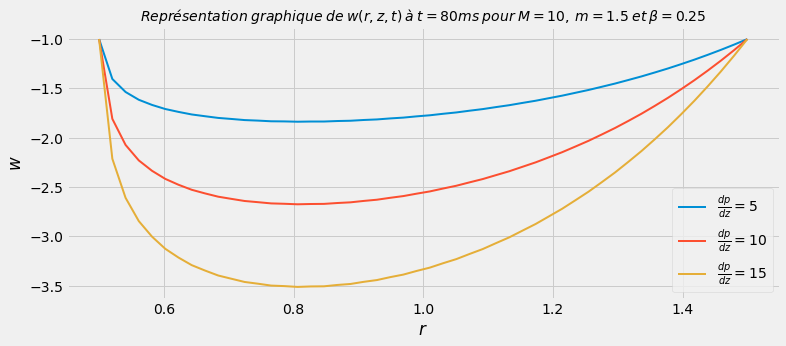

In [162]:
with plt.style.context('fivethirtyeight'):
    plt.plot(rs, df3.iloc[:, 600], linewidth=2, label=r'$\frac{dp}{dz}=5$')
    plt.plot(rs, df2.iloc[:, 600], linewidth=2, label=r'$\frac{dp}{dz}=10$')
    plt.plot(rs, df4.iloc[:, 600], linewidth=2, label=r'$\frac{dp}{dz}=15$')
    plt.legend()
    plt.xlabel('$r$')
    plt.ylabel('$w$')
    sp = r'\hspace{0.25}' # {sp}paramétre{sp}d'occlusion{sp}\epsilon
    frac = r'\frac{dp}{dz}'
    ttl = fr'$Représentation{sp}graphique{sp}de{sp}w(r,z,t){sp}à{sp}t=80ms{sp}pour{sp}M=10,{sp}m=1.5{sp}et{sp}\beta=0.25$'
    plt.title(ttl, fontsize=14)
    plt.tight_layout()
    fig = plt.gcf()
    fig.set_size_inches(12.5, 5.5)
    plt.savefig('figs/w-dp-newtonian-unsteady.png', transparent=True, dpi=100)

In [164]:
def solver_4(t, w):
    M2 = 50 ** 0.5
    m = 1.5
    omega = 8
#     Bn = 1
    dpdz = lambda x: 0.2 + 0.4 * np.math.cos(omega * x)
    return rhs(w, t, N, M2, m, dpdz)

w0 = np.ones(N)
w0 *= -1

s4 = solve_ivp(solver_4, (0, 5), w0)
df4 = pd.DataFrame(s4.y)

In [168]:
def solver_6(t, w):
    M2 = 20 ** 0.5
    m = 1.5
    omega = 8
#     Bn = 1
    dpdz = lambda x: 0.2 + 0.4 * np.math.cos(omega * x)
    return rhs(w, t, N, M2, m, dpdz)

w0 = np.ones(N)
w0 *= -1

s6 = solve_ivp(solver_6, (0, 5), w0)
df6 = pd.DataFrame(s6.y)

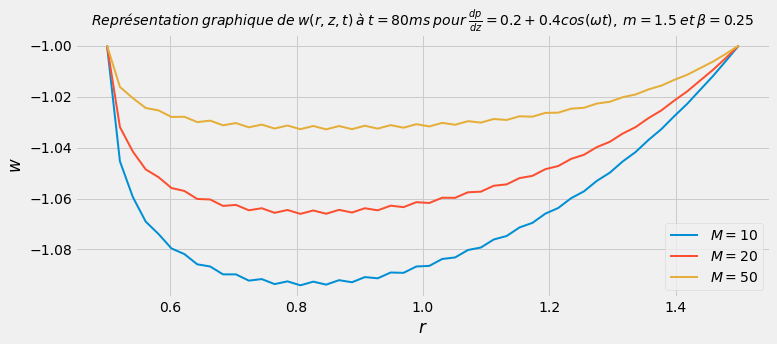

In [172]:
with plt.style.context('fivethirtyeight'):
    plt.plot(rs, df1.iloc[:, 600], linewidth=2, label=f'$M=10$')
    plt.plot(rs, df6.iloc[:, 600], linewidth=2, label=r'$M=20$')
    plt.plot(rs, df4.iloc[:, 600], linewidth=2, label=r'$M=50$')
    plt.legend()
    plt.xlabel('$r$')
    plt.ylabel('$w$')
    sp = r'\hspace{0.25}' # {sp}paramétre{sp}d'occlusion{sp}\epsilon
    frac = r'\frac{dp}{dz}=0.2+0.4cos(\omega t)'
    ttl = fr'$Représentation{sp}graphique{sp}de{sp}w(r,z,t){sp}à{sp}t=80ms{sp}pour{sp}{frac},{sp}m=1.5{sp}et{sp}\beta=0.25$'
    plt.title(ttl, fontsize=14)
    plt.tight_layout()
    fig = plt.gcf()
    fig.set_size_inches(12.5, 5.5)
    plt.savefig('figs/w-M-newtonian-unsteady.png', transparent=True, dpi=100)

In [9]:
def solver_5(t, w):
    M2 = 500**0.5
    m = 1.5
    Bn = 1
    dpdz = 10
    return rhs(w, t, N, M2, m, Bn, dpdz)

w0 = np.ones(N)

s5 = solve_ivp(solver_5, (0, 1), w0)
df5 = pd.DataFrame(s5.y)

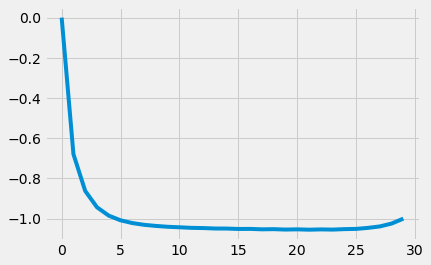

In [12]:
plt.style.use('fivethirtyeight')
# for i in range(0, N, 10):
#     plt.plot(np.arange(N), df.iloc[:, i], label=f'$t={i}$', linewidth=2)
plt.plot(np.arange(N), df5.iloc[:, 30])

In [17]:
def solver_6(t, w):
    M2 = 1000**0.5
    m = 1.5
    Bn = 1
    dpdz = 10
    return rhs(w, t, N, M2, m, Bn, dpdz)

w0 = np.ones(N)

s6 = solve_ivp(solver_6, (0, 1), w0)
df6 = pd.DataFrame(s6.y)

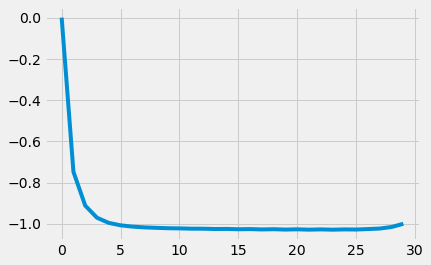

In [18]:
plt.style.use('fivethirtyeight')
# for i in range(0, N, 10):
#     plt.plot(np.arange(N), df.iloc[:, i], label=f'$t={i}$', linewidth=2)
plt.plot(np.arange(N), df6.iloc[:, 30])

Text(0.5, -0.4, 'Représentation graphique de la vitesse axiale $w(r)$\nà $t=30$, $dpdz=10$, $m=1.5$, $\\beta=2$ et $B_{n}=10$\n')

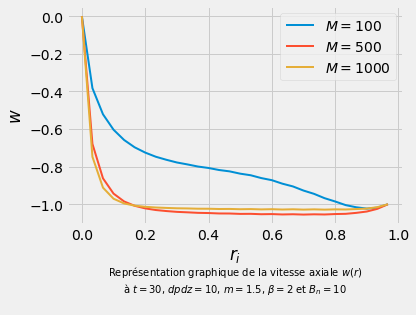

In [19]:
r = np.array([x / N for x in np.arange(N)])
plt.plot(r, df4.iloc[:, 30], linewidth=2, label=r'$M=100$')
plt.plot(r, df5.iloc[:, 30], linewidth=2, label=r'$M=500$')
plt.plot(r, df6.iloc[:, 30], linewidth=2, label=r'$M=1000$')
plt.xlabel('$r_{i}$')
plt.ylabel('$w$')
plt.legend()
title = r"""Représentation graphique de la vitesse axiale $w(r)$
à $t=30$, $dpdz=10$, $m=1.5$, $\beta=2$ et $B_{n}=10$
"""
plt.tight_layout()
plt.title(title, fontsize=10, y=-0.4)
# plt.savefig('figs/case2-1.png', transparent=True)

In [45]:
def solver_7(t, w):
    M2 = 1000**0.5
    m = 1.5
    Bn = 10
    dpdz = 100
    return rhs(w, t, N, M2, m, Bn, dpdz)

w0 = np.ones(N)

s7 = solve_ivp(solver_7, (0, 1), w0)
df7 = pd.DataFrame(s7.y)

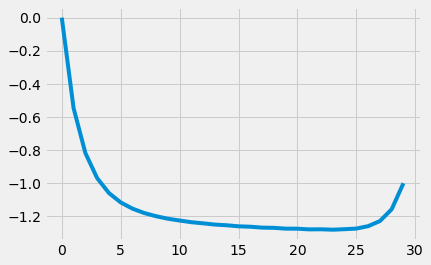

In [46]:
plt.style.use('fivethirtyeight')
# for i in range(0, N, 10):
#     plt.plot(np.arange(N), df.iloc[:, i], label=f'$t={i}$', linewidth=2)
plt.plot(np.arange(N), df7.iloc[:, 30])

In [47]:
def solver_8(t, w):
    M2 = 1000**0.5
    m = 1.5
    Bn = 0
    dpdz = 100
    return rhs(w, t, N, M2, m, Bn, dpdz)

w0 = np.ones(N)

s8 = solve_ivp(solver_8, (0, 1), w0)
df8 = pd.DataFrame(s8.y)

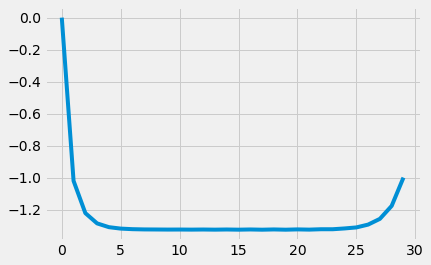

In [48]:
plt.style.use('fivethirtyeight')
# for i in range(0, N, 10):
#     plt.plot(np.arange(N), df.iloc[:, i], label=f'$t={i}$', linewidth=2)
plt.plot(np.arange(N), df8.iloc[:, 30])

In [49]:
def solver_9(t, w):
    M2 = 1000**0.5
    m = 1.5
    Bn = 15
    dpdz = 100
    return rhs(w, t, N, M2, m, Bn, dpdz)

w0 = np.ones(N)

s9 = solve_ivp(solver_9, (0, 1), w0)
df9 = pd.DataFrame(s9.y)

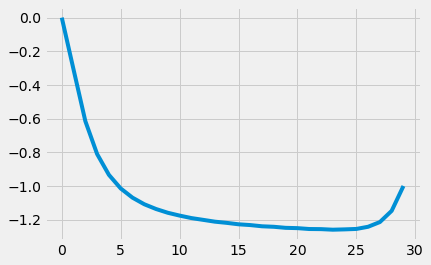

In [50]:
plt.style.use('fivethirtyeight')
# for i in range(0, N, 10):
#     plt.plot(np.arange(N), df.iloc[:, i], label=f'$t={i}$', linewidth=2)
plt.plot(np.arange(N), df9.iloc[:, 30])

Text(0.5, -0.4, 'Représentation graphique de la vitesse axiale $w(r)$\nà $t=30$, $dpdz=10$, $m=1.5$, $\\beta=2$ et $M=1000$\n')

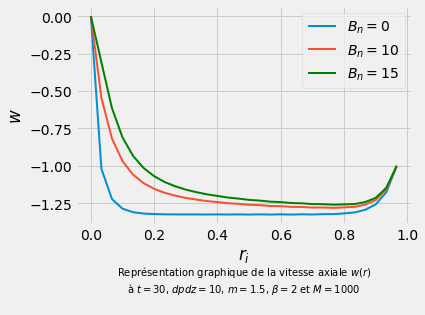

In [51]:
r = np.array([x / N for x in np.arange(N)])
plt.plot(r, df8.iloc[:, 30], linewidth=2, label=r'$B_{n}=0$')
plt.plot(r, df7.iloc[:, 30], linewidth=2, label=r'$B_{n}=10$')
plt.plot(r, df9.iloc[:, 30], linewidth=2, label=r'$B_{n}=15$', color='green')
plt.xlabel('$r_{i}$')
plt.ylabel('$w$')
plt.legend()
title = r"""Représentation graphique de la vitesse axiale $w(r)$
à $t=30$, $dpdz=10$, $m=1.5$, $\beta=2$ et $M=1000$
"""
plt.tight_layout()
plt.title(title, fontsize=10, y=-0.4)
# plt.savefig('figs/case3.png', transparent=True)